<a href="https://colab.research.google.com/github/mikemiller97/disaster-prediction/blob/main/nlp_disaster_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing with Disaster Tweets
>Predict which Tweets are about real disasters and which ones are not

## 1. Problem Definition

The following description is taken from the [Kaggle competition page](https://www.kaggle.com/competitions/nlp-getting-started/overview)
>Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).

>In this competition, you’re challenged to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t.

## 2. Data
>The data has been taken from the same Kaggle competition. The data has been broken down into a testing and training set with a sample submission file.

## 3. Features

|Variable | Definition|
|----------|------------|
|id | a unique identifier for each tweet|
|text | the text of the tweet|
|location | the location the tweet was sent from (may be blank)|
|keyword | a particular keyword from the tweet (may be blank)|
|target | in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)|


## Imports

In [ ]:
!pip install transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.1 MB/s eta 0:00:00


In [ ]:
#Preparing preprocessing model
!pip install tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 26.6 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Fou

In [ ]:
!pip install keras-nlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.5/573.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 924.6/924.6 kB 11.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import tensorflow as tf

import tensorflow_text as text
from tensorflow.keras.layers import TextVectorization
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import tensorflow_hub as hub
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import keras_nlp

Using TensorFlow backend


## Data Exploration

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/nlp-disaster-classification/train.csv", index_col="id")
test = pd.read_csv("/content/drive/MyDrive/nlp-disaster-classification/test.csv", index_col="id")

In [ ]:
train.head()

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
test.head()

,keyword,location,text
id,,,
0,NaN,NaN,Just happened a terrible car crash
2,NaN,NaN,"Heard about #earthquake is different cities, s..."
3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
train.columns

Index(['keyword', 'location', 'text', 'target'], dtype='object')

In [ ]:
train.dtypes

keyword     object
location    object
text        object
target       int64
dtype: object

In [ ]:
train.isna().sum()

keyword       61
location    2533
text           0
target         0
dtype: int64

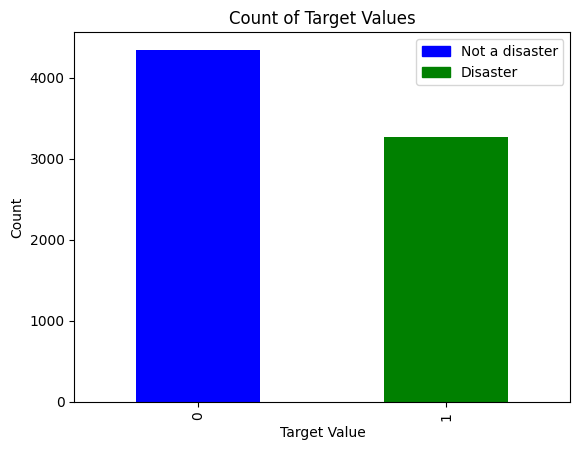

In [ ]:
result = train.groupby("target").size()

# Create a bar graph with custom colors
ax = result.plot(kind="bar", color=["blue", "green"])

# Adding labels and title
plt.xlabel("Target Value")
plt.ylabel("Count")
plt.title("Count of Target Values")

# Create colored patches for the legend
colors = ["blue", "green"]
labels = ["Not a disaster", "Disaster"]
patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(colors))]

# Adding custom legend with colored patches
ax.legend(handles=patches)

# Display the plot
plt.show()


In [ ]:
train.sample(n=10)

,keyword,location,text,target
id,,,,
3845,detonate,"Sydney, Australia",New music from @ApolloBrown featuring M.O.P.? ...,0
801,battle,Jerusalem!,Indeed!! I am fully aware of that battle! I su...,1
2505,collision,'soooota,@Zojadelin you literally almost had a head on ...,1
5792,hail,Calgary/Airdrie/RedDeer/AB,@tremblayeh we like big hail and we cannot lie...,0
10430,whirlwind,"pettyville, usa",this week has been a whirlwind but this is ex...,0
6064,heat%20wave,NaN,Heat wave is ending! Watching a big area of ra...,1
10736,wreckage,Tokyo,Wreckage Confirmed As Part of Missing Malaysia...,1
8094,rescued,United States,@Zak_Bagans this is Sabrina my dad rescued her...,1
2114,catastrophe,NaN,failure is a misfortunebut regret is a catastr...,0


## Preparing Data

>It appears that there are more non-disaster than disaster tweets, but there is still a good amount of both. The first step to preparing the data for a ML model will be filling the missing data in the keyword and location columns.

In [ ]:
train_copy = train.copy()

In [ ]:
train_copy.head()

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
#Filling missing location and keyword data
fill_value = "Unknown"

missing_location = train_copy["location"].isna()
missing_keyword = train_copy["keyword"].isna()

train_copy.loc[missing_location, "location"] = fill_value
train_copy.loc[missing_keyword, "keyword"] = fill_value

In [ ]:
train_copy.head()

,keyword,location,text,target
id,,,,
1,Unknown,Unknown,Our Deeds are the Reason of this #earthquake M...,1
4,Unknown,Unknown,Forest fire near La Ronge Sask. Canada,1
5,Unknown,Unknown,All residents asked to 'shelter in place' are ...,1
6,Unknown,Unknown,"13,000 people receive #wildfires evacuation or...",1
7,Unknown,Unknown,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_copy.sample(n=10)

,keyword,location,text,target
id,,,,
10411,whirlwind,140920-21 & 150718-19 BEIJING,{INFO} Baekhyun and Suho will be attending the...,0
1531,bomb,Unknown,beforeitsnews : Global Derivatives: $1.5 Quadr...,0
4850,evacuation,"Tri-Cities, Wash.",Evacuation order lifted for town of Roosevelt:...,1
8103,rescued,Canada,10-Month-Old Baby Girl was Rescued by Coastgua...,1
5418,first%20responders,Unknown,First responders would never be sent to the wr...,0
4637,emergency%20services,"Los Angeles, CA",Want to work in #Tarzana CA? View our latest o...,0
8980,storm,#PhanTrash,The sky's clear the storm has passed but it's ...,0
6145,hijack,Unknown,0-day bug in fully patched OS X comes under ac...,0
9311,survive,"???????, Texas",DON'T MAKE FUN OF THEM FOR TRYING\nTO SURVIVE ...,0


In [ ]:
train_copy.isna().sum()

keyword     0
location    0
text        0
target      0
dtype: int64

>Now that all the data has been filled, it still needs to be converted to numbers and embedded when necessary.

In [ ]:
train_copy.dtypes

keyword     object
location    object
text        object
target       int64
dtype: object

In [ ]:
#First, I will one hot encode the keyword and location columns
columns_to_encode = ['keyword', 'location']

train_copy = pd.get_dummies(train_copy, columns=columns_to_encode)

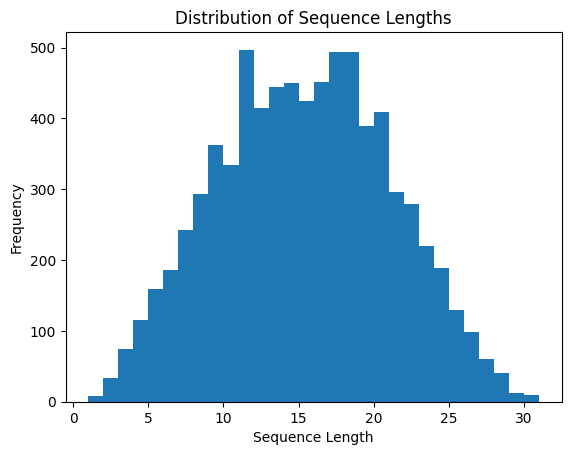

In [ ]:
#Lets find a good padding value for vectorization!

text_data = train_copy["text"]

# Calculate the lengths of each sequence (number of tokens)
sequence_lengths = text_data.apply(lambda x: len(x.split()))

# Create a histogram
plt.hist(sequence_lengths, bins=30)
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.title("Distribution of Sequence Lengths")
plt.show()

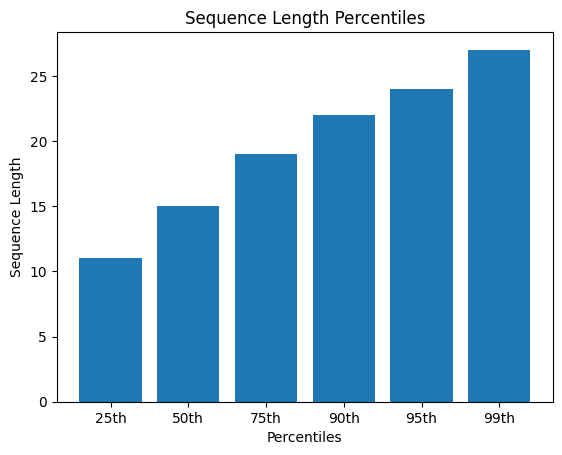

In [ ]:
# Assuming your DataFrame is named df_copy
text_data= train_copy["text"]

# Calculate the lengths of each sequence (number of tokens)
sequence_lengths = text_data.apply(lambda x: len(x.split()))

# Calculate percentiles
percentiles = np.percentile(sequence_lengths, [25, 50, 75, 90, 95, 99])

# Print percentiles
plt.bar(range(len(percentiles)), percentiles)
plt.xticks(range(len(percentiles)), [f"{p}th" for p in [25, 50, 75, 90, 95, 99]])
plt.xlabel("Percentiles")
plt.ylabel("Sequence Length")
plt.title("Sequence Length Percentiles");

>I will use 25 as this captures almost all of the tweets

In [ ]:
#Now, I will embed the text so a NLP can be used on it. First the vectorization layer
vectorizer =  tf.keras.layers.TextVectorization(max_tokens=1000,
                                                standardize='lower_and_strip_punctuation',
                                                output_mode='int',
                                                pad_to_max_tokens=True,
                                                output_sequence_length=25)

In [ ]:
vectorizer.adapt(train_copy["text"])

In [ ]:
#Now the embedding layer
embedding_layer = tf.keras.layers.Embedding(input_dim=len(vectorizer.get_vocabulary()),
                                            output_dim=128,
                                            input_length=25)

## Split data into training and validation sets

In [ ]:
X = train_copy["text"]
y = train_copy["target"]

In [ ]:
X.shape, y.shape

((7613,), (7613,))

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42)

In [ ]:
X_train.shape, y_train.shape

((6090,), (6090,))

In [ ]:
def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
def make_preds(model_name):
  model = tf.keras.models.load_model('/content/drive/MyDrive/nlp-disaster-classification/models/' + model_name)

  preds = model.predict(X_val)

  #reshaping array to fit in comparison function below
  preds = np.argmax(preds, axis=1)

  results = calculate_results(y_true=y_val,
                              y_pred=preds)
  print(results)

## Baseline Model (SKL)

In [ ]:
#create tokenization and modeling pipeline
model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB()),
])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

# Define the ModelCheckpoint callback
model_checkpoint = ModelCheckpoint("/content/drive/MyDrive/nlp-disaster-classification/models/model_0", save_best_only=True)

#fit pipeline to training data
model_0_history = model_0.fit(X=X_train, y=y_train)

In [ ]:
#Evaluate baseline model
baseline_score = model_0.score(X_val, y_val)
baseline_score

0.7997373604727511

## Transfer Learning Model (BERT Tiny)
>BERT's model takes in plain text to interpret so it will be passed the initial version of the text before any vectorization or embedding.

>https://keras.io/api/keras_nlp/models/bert/bert_classifier/

In [ ]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

# Define the ModelCheckpoint callback
model_checkpoint = ModelCheckpoint("/content/drive/MyDrive/nlp-disaster-classification/models/model_1", save_best_only=True)


# Load architecture and weights from preset
model_1 = keras_nlp.models.BertClassifier.from_preset("bert_tiny_en_uncased", num_classes=2)

# Load randomly initialized model from preset architecture
model_1_history = model_1.fit(x=X_train,
                              y=y_train,
                              batch_size=16,
                              epochs=20,
                              validation_data=(X_val, y_val),
                              callbacks=[early_stopping, model_checkpoint])

17602216/17602216 [==============================] - 1s 0us/step
Epoch 1/20
381/381 [==============================] - 139s 296ms/step - loss: 0.5556 - sparse_categorical_accuracy: 0.7156 - val_loss: 0.4445 - val_sparse_categorical_accuracy: 0.8148
Epoch 2/20
381/381 [==============================] - 90s 237ms/step - loss: 0.4243 - sparse_categorical_accuracy: 0.8163 - val_loss: 0.4082 - val_sparse_categorical_accuracy: 0.8267
Epoch 3/20
381/381 [==============================] - 87s 229ms/step - loss: 0.3706 - sparse_categorical_accuracy: 0.8447 - val_loss: 0.4014 - val_sparse_categorical_accuracy: 0.8293
Epoch 4/20
381/381 [==============================] - 116s 305ms/step - loss: 0.3215 - sparse_categorical_accuracy: 0.8690 - val_loss: 0.4148 - val_sparse_categorical_accuracy: 0.8326
Epoch 5/20
381/381 [==============================] - 89s 233ms/step - loss: 0.2699 - sparse_categorical_accuracy: 0.8982 - val_loss: 0.4426 - val_sparse_categorical_accuracy: 0.8188
Epoch 6/20
381/381

In [ ]:
model_1 = tf.keras.models.load_model('/content/drive/MyDrive/nlp-disaster-classification/models/model_1')

In [ ]:
model_1_preds = model_1.predict(test["text"])

#reshaping array to fit in comparison function below
model_1_preds = np.argmax(model_1_preds, axis=1)

102/102 [==============================] - 9s 77ms/step


In [ ]:
model_1_preds.shape

(3263,)

In [ ]:
make_preds("model_1")

48/48 [==============================] - 3s 50ms/step
{'accuracy': 82.9284307288247, 'precision': 0.8311802875978043, 'recall': 0.8292843072882469, 'f1': 0.827040655771264}


## BERT Small Sized

In [ ]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

# Define the ModelCheckpoint callback
model_checkpoint = ModelCheckpoint("/content/drive/MyDrive/nlp-disaster-classification/models/model_2", save_best_only=True)


# Load architecture and weights from preset
model_2 = keras_nlp.models.BertClassifier.from_preset("bert_small_en_uncased", num_classes=2)

# Load randomly initialized model from preset architecture
model_2_history = model_2.fit(x=X_train,
                              y=y_train,
                              batch_size=16,
                              epochs=20,
                              validation_data=(X_val, y_val),
                              callbacks=[early_stopping, model_checkpoint])

In [ ]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

# Define the ModelCheckpoint callback
model_checkpoint = ModelCheckpoint("/content/drive/MyDrive/nlp-disaster-classification/models/model_3", save_best_only=True)

# Load randomly initialized model from preset architecture
model_2_history = model_2.fit(x=X_train,
                              y=y_train,
                              batch_size=16,
                              epochs=20,
                              validation_data=(X_val, y_val),
                              callbacks=[early_stopping, model_checkpoint])

In [ ]:
model_2 = tf.keras.models.load_model('/content/drive/MyDrive/nlp-disaster-classification/models/model_2')

make_preds("model_2")

48/48 [==============================] - 17s 258ms/step
{'accuracy': 83.19107025607354, 'precision': 0.8390874409502028, 'recall': 0.8319107025607354, 'f1': 0.8280618958973341}


## Hypertuning BERT

>It does seem that giving the model more columns to work with slightly improves the score! Now lets try hypertuning the model by making the last few layers of BERT trainable.

In [ ]:
model_3 = tf.keras.models.load_model('/content/drive/MyDrive/nlp-disaster-classification/models/model_2')

In [ ]:
model_3.layers

In [ ]:
bert_backbone = model_3.layers[3]
bert_layers = bert_backbone.layers
bert_layers

In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(bert_layers):
  print(layer_number, layer.name, layer.trainable)

In [ ]:
#Testing how the model will do if all these layers are false
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

# Define the ModelCheckpoint callback
model_checkpoint = ModelCheckpoint("/content/drive/MyDrive/nlp-disaster-classification/models/model_3", save_best_only=True)


# Load architecture and weights from preset
model_3 = keras_nlp.models.BertClassifier.from_preset("bert_small_en_uncased", num_classes=2)

In [ ]:
model_3.layers

In [ ]:
bert_backbone = model_3.layers[3]
bert_layers = bert_backbone.layers
bert_layers

# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(bert_layers):
  print(layer_number, layer.name, layer.trainable)

In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(bert_layers):
  layer.trainable = False

In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(bert_layers):
  print(layer_number, layer.name, layer.trainable)

In [ ]:
# Load randomly initialized model from preset architecture
model_3_history = model_3.fit(x=X_train,
                              y=y_train,
                              batch_size=16,
                              epochs=20,
                              validation_data=(X_val, y_val),
                              callbacks=[early_stopping, model_checkpoint])

In [ ]:
make_preds("model_3")

48/48 [==============================] - 14s 260ms/step
{'accuracy': 82.9284307288247, 'precision': 0.839878690879612, 'recall': 0.8292843072882469, 'f1': 0.8244410947896543}


In [ ]:
model_3_hypertuned = tf.keras.models.load_model('/content/drive/MyDrive/nlp-disaster-classification/models/model_3')

bert_backbone = model_3_hypertuned.layers[3]
bert_layers = bert_backbone.layers
bert_layers

# Calculate the total number of layers in bert_layers
total_layers = len(bert_layers)

# Calculate the starting index for the last five layers
start_index = total_layers - 5

# Make the last five layers trainable, and set the rest as non-trainable
for layer_number, layer in enumerate(bert_layers):
    if layer_number >= start_index:
        layer.trainable = True
    else:
        layer.trainable = False

# Check the trainable status of each layer
for layer_number, layer in enumerate(bert_layers):
    print(layer_number, layer.name, layer.trainable)

In [ ]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

# Define the ModelCheckpoint callback
model_checkpoint = ModelCheckpoint("/content/drive/MyDrive/nlp-disaster-classification/models/model_3_hypertuned", save_best_only=True)



history_model_3_hypertuned = model_3_hypertuned.fit(x=X_train,
                                                    y=y_train,
                                                    batch_size=16,
                                                    initial_epoch=5,
                                                    epochs=20,
                                                    validation_data=(X_val, y_val),
                                                    callbacks=[early_stopping, model_checkpoint])

In [ ]:
model_3 = tf.keras.models.load_model('/content/drive/MyDrive/nlp-disaster-classification/models/model_3')

make_preds("model_3")

48/48 [==============================] - 14s 256ms/step
{'accuracy': 82.9284307288247, 'precision': 0.839878690879612, 'recall': 0.8292843072882469, 'f1': 0.8244410947896543}


>It seems that hypertuning has not resulted in a more accurate model.


## RoBERTa
>https://keras.io/api/keras_nlp/models/roberta/roberta_classifier/#robertaclassifier-class

In [ ]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

# Define the ModelCheckpoint callback
model_checkpoint = ModelCheckpoint("/content/drive/MyDrive/nlp-disaster-classification/models/model_4", save_best_only=True)


# Load architecture and weights from preset
model_4 = keras_nlp.models.RobertaClassifier.from_preset("roberta_base_en",
                                                         num_classes=2)

# Load randomly initialized model from preset architecture
model_4_history = model_4.fit(x=X_train,
                              y=y_train,
                              batch_size=8,
                              epochs=20,
                              validation_data=(X_val, y_val),
                              callbacks=[early_stopping, model_checkpoint])

In [ ]:
make_preds("model_4")

48/48 [==============================] - 81s 1s/step
{'accuracy': 83.12541037426132, 'precision': 0.8308559474690731, 'recall': 0.8312541037426132, 'f1': 0.8304357273459815}


## Exporting predictions

In [ ]:
best_model = tf.keras.models.load_model('/content/drive/MyDrive/nlp-disaster-classification/models/model_2')

preds = best_model.predict(test["text"])

102/102 [==============================] - 30s 273ms/step


In [ ]:
preds = np.argmax(preds, axis=1)

In [ ]:
df = pd.DataFrame({"id": test.index, "target": preds})

df.to_csv('predictions.csv', index=False)